In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings("ignore")

In [2]:
movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv')

 Exploratory Data Analysis (EDA) 

In [3]:
movies.shape

(4803, 20)

In [4]:
# Check the data types and missing values
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [5]:
# Summary statistics for numeric columns
movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [6]:
# Check for missing values
missing_values = movies.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64


<Axes: >

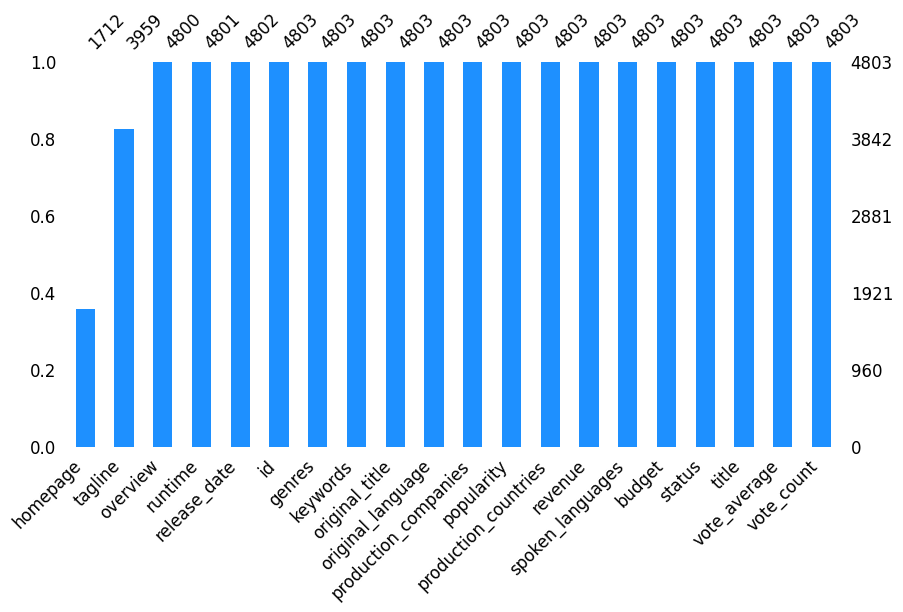

In [7]:
msno.bar(movies, color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12)

<Axes: >

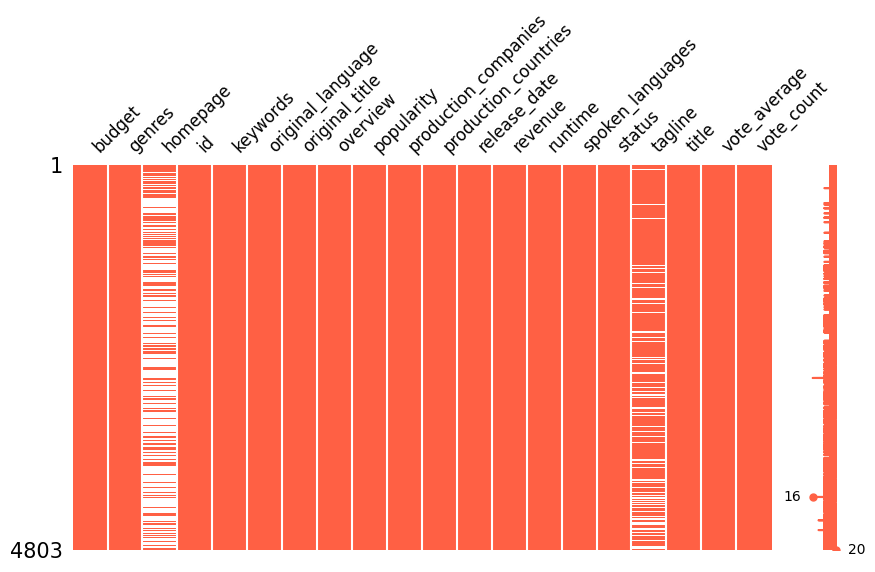

In [8]:
msno.matrix(movies, figsize=(10,5), fontsize=12, color=(1, 0.38, 0.27))

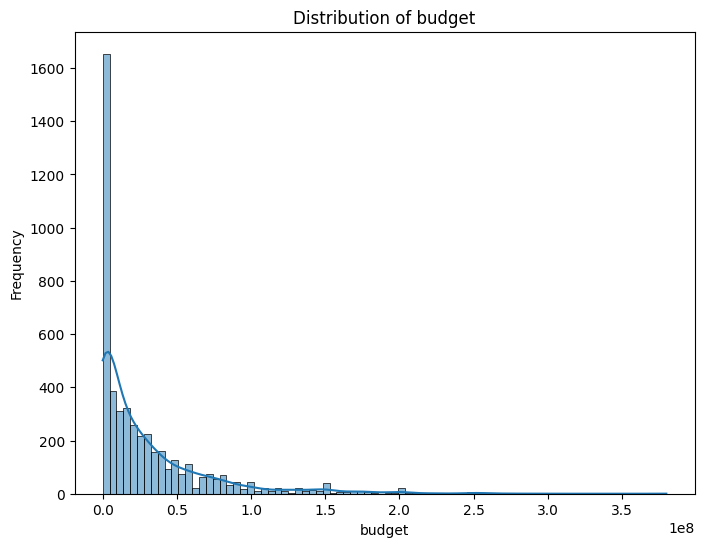

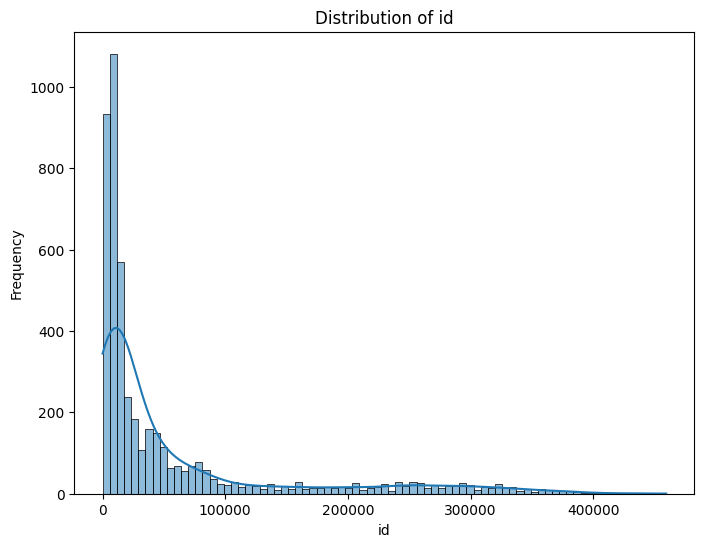

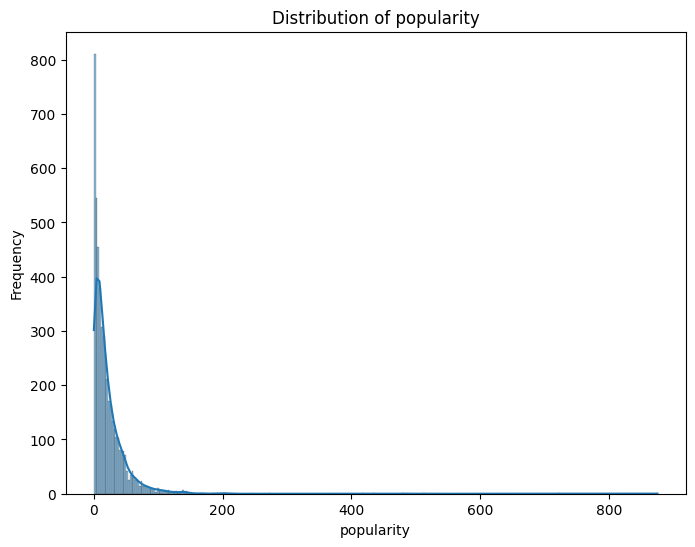

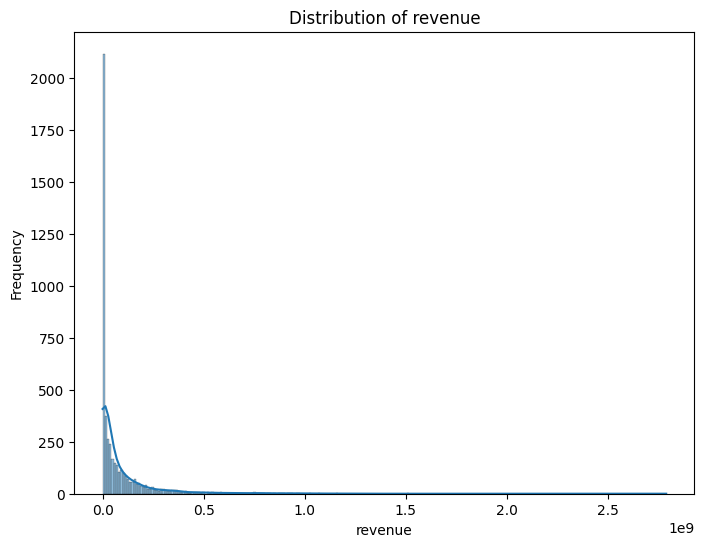

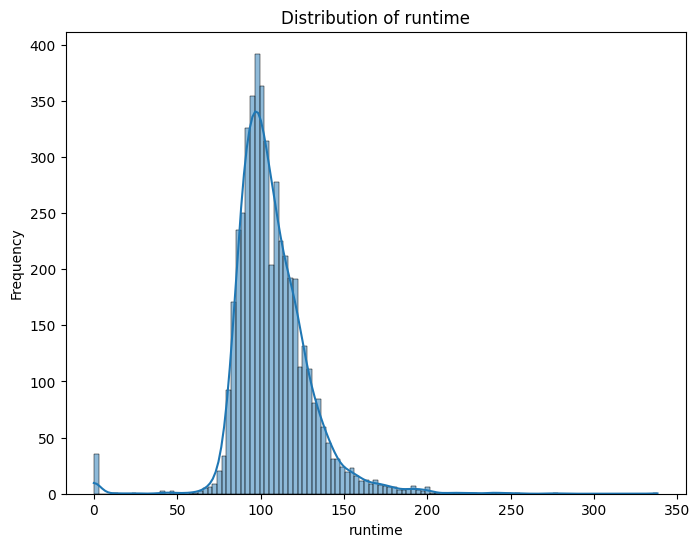

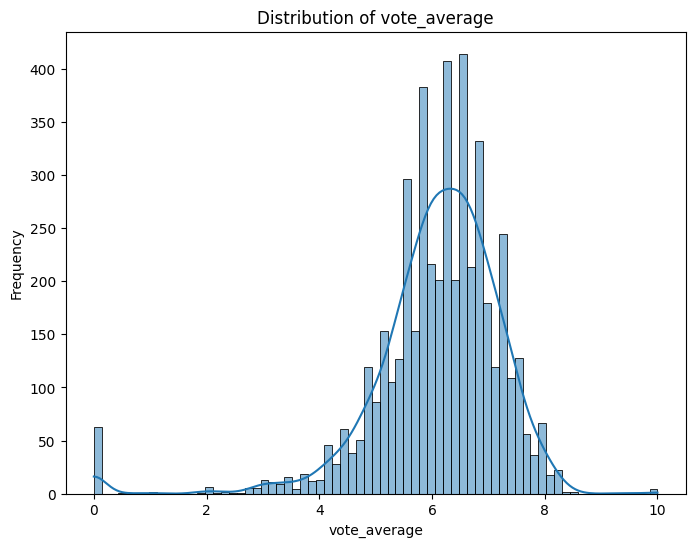

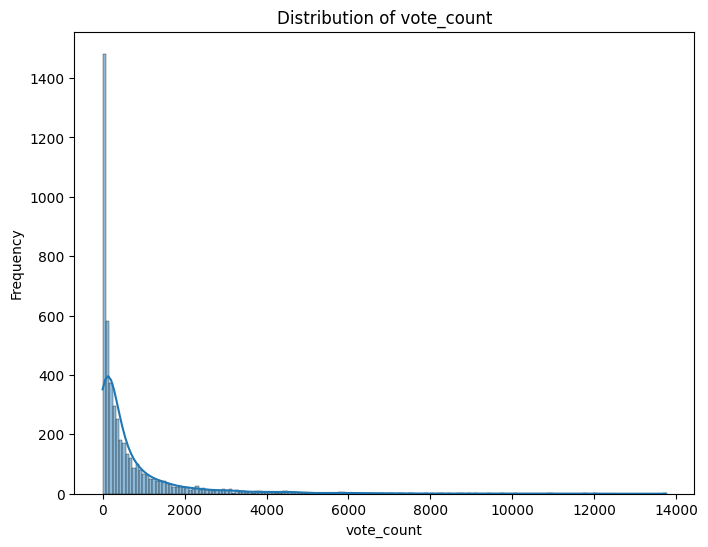

In [9]:
# Explore the distribution of numeric columns
numeric_columns = movies.select_dtypes(include=['int64', 'float64'])
for col in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(movies[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [10]:
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [11]:
credits.shape

(4803, 4)

In [12]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [13]:
credits.describe()

,movie_id
count,4803.000000
mean,57165.484281
std,88694.614033
min,5.000000
25%,9014.500000
50%,14629.000000
75%,58610.500000
max,459488.000000


In [14]:
# Checking for Missing Values
missing_values = credits.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
movie_id    0
title       0
cast        0
crew        0
dtype: int64


In [15]:
credits.head(2)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [16]:
#Merging the datasets using title on credits
movies = movies.merge(credits,on='title')

In [17]:
movies.shape
#Now there is a total of 23 columns formed by merging 19 and 3 columns on 1 column

(4809, 23)

In [18]:
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [19]:
#Removing unnecessary columns
movies = movies[['movie_id','title','overview','genres','keywords','cast','crew']]
movies.head(1)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [20]:
#Checking and Remove Missing data
movies.isnull().sum()

movie_id    0
title       0
overview    3
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [21]:
movies.dropna(inplace=True)

In [22]:
movies.isnull().sum()

movie_id    0
title       0
overview    0
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [23]:
movies.duplicated().sum()

0

Preprocessing

In [24]:
movies.iloc[0].genres

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [25]:
import ast
ast.literal_eval('[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]')

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [26]:
def convert(obj):
    L = []
    for i in ast.literal_eval(obj):
        L.append(i['name'])
    return L

In [27]:
movies['genres'].apply(convert)

0       [Action, Adventure, Fantasy, Science Fiction]
1                        [Adventure, Fantasy, Action]
2                          [Action, Adventure, Crime]
3                    [Action, Crime, Drama, Thriller]
4                [Action, Adventure, Science Fiction]
                            ...                      
4804                        [Action, Crime, Thriller]
4805                                [Comedy, Romance]
4806               [Comedy, Drama, Romance, TV Movie]
4807                                               []
4808                                    [Documentary]
Name: genres, Length: 4806, dtype: object

In [28]:
movies['genres'] = movies['genres'].apply(convert)
movies.head(1)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


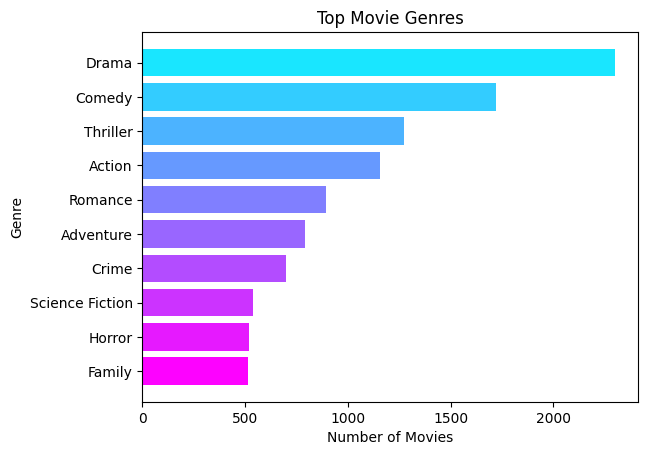

In [29]:
a = plt.cm.cool

top_genres = movies['genres'].explode().value_counts().head(10)
plt.barh(top_genres.index, top_genres.values, color=[a(0.1), a(0.2), a(0.3), a(0.4), a(0.5), a(0.6), a(0.7), a(0.8), a(0.9), a(0.99)])
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.title('Top Movie Genres')
plt.gca().invert_yaxis()
plt.show()

In [30]:
movies['keywords'].apply(convert)

0       [culture clash, future, space war, space colon...
1       [ocean, drug abuse, exotic island, east india ...
2       [spy, based on novel, secret agent, sequel, mi...
3       [dc comics, crime fighter, terrorist, secret i...
4       [based on novel, mars, medallion, space travel...
                              ...                        
4804    [united states–mexico barrier, legs, arms, pap...
4805                                                   []
4806    [date, love at first sight, narration, investi...
4807                                                   []
4808            [obsession, camcorder, crush, dream girl]
Name: keywords, Length: 4806, dtype: object

In [31]:
movies['keywords'] = movies['keywords'].apply(convert)
movies.head(1)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [32]:
movies['cast'][0]

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

In [33]:
#We have this much amount of value in here. But we just need the top 3 actors
def convert3(obj):
    L = []
    counter=0
    for i in ast.literal_eval(obj):
        if(counter!=3):
            L.append(i['name'])
            counter+=1
        else:
            break
    return L

In [34]:
movies['cast'].apply(convert3)

0        [Sam Worthington, Zoe Saldana, Sigourney Weaver]
1           [Johnny Depp, Orlando Bloom, Keira Knightley]
2            [Daniel Craig, Christoph Waltz, Léa Seydoux]
3            [Christian Bale, Michael Caine, Gary Oldman]
4          [Taylor Kitsch, Lynn Collins, Samantha Morton]
                              ...                        
4804    [Carlos Gallardo, Jaime de Hoyos, Peter Marqua...
4805         [Edward Burns, Kerry Bishé, Marsha Dietlein]
4806           [Eric Mabius, Kristin Booth, Crystal Lowe]
4807            [Daniel Henney, Eliza Coupe, Bill Paxton]
4808    [Drew Barrymore, Brian Herzlinger, Corey Feldman]
Name: cast, Length: 4806, dtype: object

In [35]:
movies['cast'] = movies['cast'].apply(convert3)
movies.head(1)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [36]:
movies['crew'][0]

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [37]:
#We only need the ‘director’ name from this data, hence we need to extract the job ‘Director’.
def fetchDirector(obj):
    L = []
    for i in ast.literal_eval(obj):
        if(i['job']=='Director'):
            L.append(i['name'])
            break
    return L

In [38]:
movies['crew'] = movies['crew'].apply(fetchDirector)
movies['crew']

0           [James Cameron]
1          [Gore Verbinski]
2              [Sam Mendes]
3       [Christopher Nolan]
4          [Andrew Stanton]
               ...         
4804     [Robert Rodriguez]
4805         [Edward Burns]
4806          [Scott Smith]
4807          [Daniel Hsia]
4808     [Brian Herzlinger]
Name: crew, Length: 4806, dtype: object

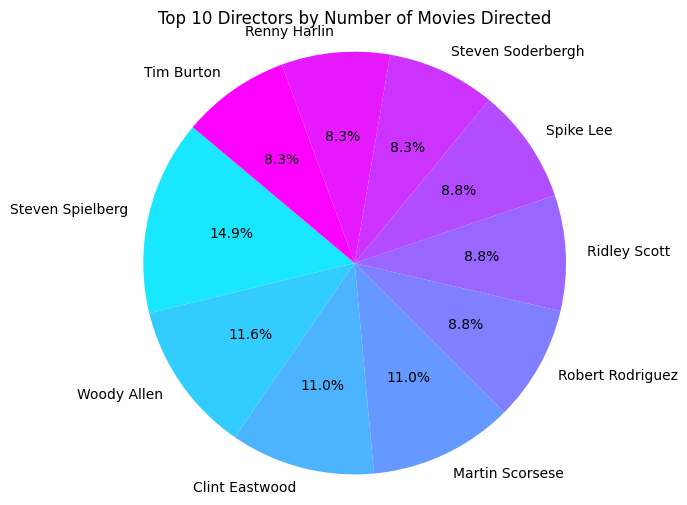

In [39]:
a = plt.cm.cool

all_directors = [director for directors_list in movies['crew'] for director in directors_list]

director_counts = pd.Series(all_directors).value_counts()

top_10_directors = director_counts.head(10)

colors = [a(0.1), a(0.2), a(0.3), a(0.4), a(0.5), a(0.6), a(0.7), a(0.8), a(0.9), a(0.99)]

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(top_10_directors.values, labels=top_10_directors.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Directors by Number of Movies Directed')
plt.axis('equal')

plt.show()

In [40]:
movies.head(1)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]


In [41]:
movies['overview'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [42]:
#‘overview’ is actually a string and all other columns are lists. Hence we will convert the string into list
movies['overview'] = movies['overview'].apply(lambda x:x.split())
movies.head(1)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]


In [43]:
movies.head(3)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]


In [44]:
#the content is separated by white spaces and we don’t want them to scatter while we concatenate and build our model otherwise it will lead to low efficiency
movies['genres'] = movies['genres'].apply(lambda x:[i.replace(" ","") for i in x])
movies['keywords'] = movies['keywords'].apply(lambda x:[i.replace(" ","") for i in x])
movies['cast'] = movies['cast'].apply(lambda x:[i.replace(" ","") for i in x])
movies['crew'] = movies['crew'].apply(lambda x:[i.replace(" ","") for i in x])

In [45]:
movies.head(3)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes]


In [46]:
movies['tags'] = movies['overview']+movies['genres']+movies['keywords']+movies['cast']+movies['crew']

In [47]:
movies['tags'][0]

['In',
 'the',
 '22nd',
 'century,',
 'a',
 'paraplegic',
 'Marine',
 'is',
 'dispatched',
 'to',
 'the',
 'moon',
 'Pandora',
 'on',
 'a',
 'unique',
 'mission,',
 'but',
 'becomes',
 'torn',
 'between',
 'following',
 'orders',
 'and',
 'protecting',
 'an',
 'alien',
 'civilization.',
 'Action',
 'Adventure',
 'Fantasy',
 'ScienceFiction',
 'cultureclash',
 'future',
 'spacewar',
 'spacecolony',
 'society',
 'spacetravel',
 'futuristic',
 'romance',
 'space',
 'alien',
 'tribe',
 'alienplanet',
 'cgi',
 'marine',
 'soldier',
 'battle',
 'loveaffair',
 'antiwar',
 'powerrelations',
 'mindandsoul',
 '3d',
 'SamWorthington',
 'ZoeSaldana',
 'SigourneyWeaver',
 'JamesCameron']

In [48]:
#New dataframe will only contain 3 columns
new_df = movies[['movie_id','title','tags']]
new_df.head(2)

,movie_id,title,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."


In [49]:
#Now the ‘tags’ should be a paragraph i.e. a string to make it understood by the model
new_df['tags'] = new_df['tags'].apply(lambda x: " ".join(x))

In [50]:
new_df['tags'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. Action Adventure Fantasy ScienceFiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d SamWorthington ZoeSaldana SigourneyWeaver JamesCameron'

In [51]:
#It is best practice to convert this into lower case alphabets
new_df['tags'] =  new_df['tags'].apply(lambda x:x.lower())
new_df['tags'][0]

'in the 22nd century, a paraplegic marine is dispatched to the moon pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. action adventure fantasy sciencefiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d samworthington zoesaldana sigourneyweaver jamescameron'

Vectorization technique:Bag of Words

In [52]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000, stop_words='english')

In [53]:
cv

CountVectorizer(max_features=5000, stop_words='english')

In [54]:
vectors = cv.fit_transform(new_df['tags']).toarray()
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [55]:
feature_names = cv.get_feature_names_out()
print(feature_names[:100])

['000' '007' '10' '100' '11' '12' '13' '14' '15' '16' '17' '18' '18th'
 '19' '1930s' '1940s' '1950' '1950s' '1960s' '1970s' '1971' '1976' '1980'
 '1980s' '1985' '1990s' '1999' '19th' '19thcentury' '20' '200' '2009'
 '20th' '24' '25' '30' '300' '3d' '40' '50' '500' '60' '60s' '70' 'aaron'
 'aaroneckhart' 'abandoned' 'abducted' 'abigailbreslin' 'abilities'
 'ability' 'able' 'aboard' 'abuse' 'abusive' 'academic' 'academy' 'accept'
 'accepted' 'accepts' 'access' 'accident' 'accidental' 'accidentally'
 'accompanied' 'accomplish' 'account' 'accountant' 'accused' 'ace'
 'achieve' 'act' 'acting' 'action' 'actionhero' 'actions' 'activist'
 'activities' 'activity' 'actor' 'actors' 'actress' 'acts' 'actual'
 'actually' 'adam' 'adams' 'adamsandler' 'adamshankman' 'adaptation'
 'adapted' 'addict' 'addicted' 'addiction' 'adolescence' 'adopt' 'adopted'
 'adoption' 'adopts' 'adrienbrody']


In [56]:
#this feature contains similar words in a different form. For eg. loved, loving, love
import nltk
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [57]:
def stem(text):
    y = []
    for i in text.split():
        y.append(ps.stem(i))
    return " ".join(y)

In [58]:
ps.stem('loved')

'love'

In [59]:
ps.stem('loving')

'love'

In [60]:
ps.stem('love')

'love'

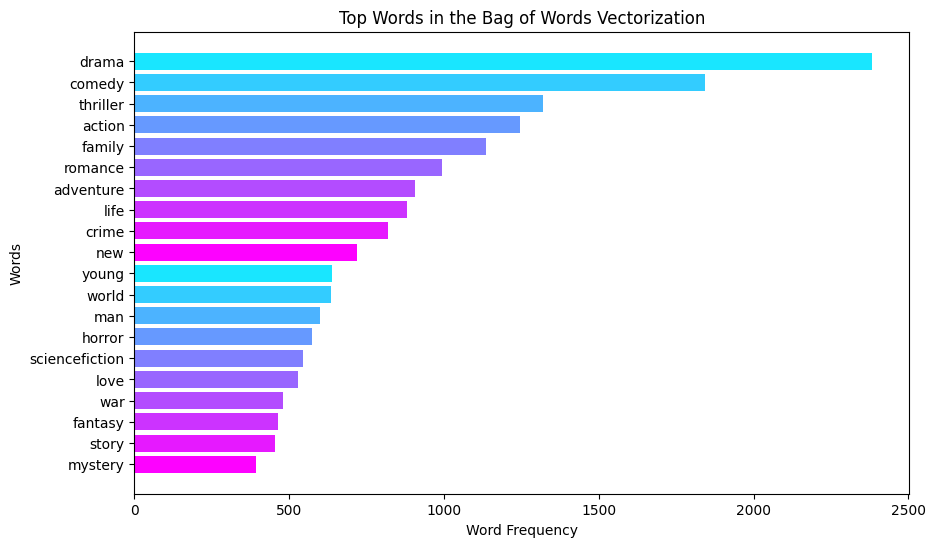

In [61]:
cv = CountVectorizer(max_features=20, stop_words='english')
word_counts = cv.fit_transform(new_df['tags'])

vocab = cv.get_feature_names_out()
word_freq = word_counts.sum(axis=0).A1

sorted_words = [x for _, x in sorted(zip(word_freq, vocab), reverse=True)]

sorted_freq = sorted(word_freq, reverse=True)

a = plt.cm.cool 

plt.figure(figsize=(10, 6))
plt.barh(sorted_words, sorted_freq, color=[a(0.1), a(0.2), a(0.3), a(0.4), a(0.5), a(0.6), a(0.7), a(0.8), a(0.9), a(0.99)])
plt.xlabel('Word Frequency')
plt.ylabel('Words')
plt.title('Top Words in the Bag of Words Vectorization')
plt.gca().invert_yaxis()
plt.show()

In [62]:
new_df['tags'] = new_df['tags'].apply(stem)

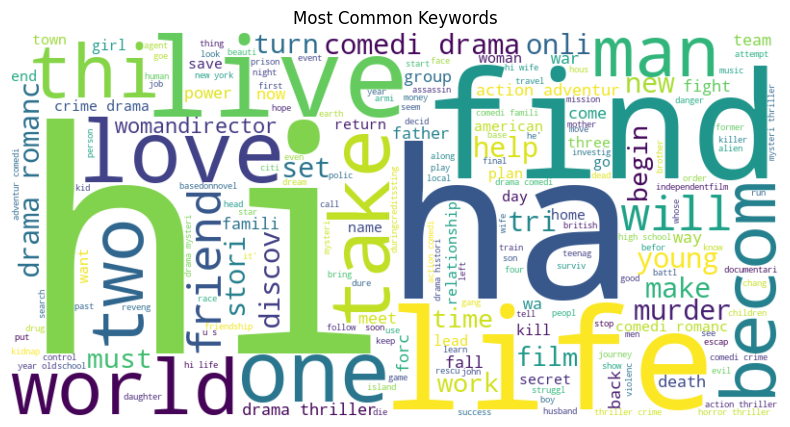

In [63]:
from wordcloud import WordCloud

keywords_text = ' '.join(new_df['tags'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(keywords_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Keywords')
plt.show()

In [64]:
#we will calculate the distance between every movie for movie using:cosine angle
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(vectors)

array([[1.        , 0.08980265, 0.05986843, ..., 0.02457366, 0.02777778,
        0.        ],
       [0.08980265, 1.        , 0.06451613, ..., 0.02648136, 0.        ,
        0.        ],
       [0.05986843, 0.06451613, 1.        , ..., 0.02648136, 0.        ,
        0.        ],
       ...,
       [0.02457366, 0.02648136, 0.02648136, ..., 1.        , 0.07372098,
        0.04721922],
       [0.02777778, 0.        , 0.        , ..., 0.07372098, 1.        ,
        0.05337605],
       [0.        , 0.        , 0.        , ..., 0.04721922, 0.05337605,
        1.        ]])

In [65]:
similarity = cosine_similarity(vectors)

In [66]:
similarity[0]

array([1.        , 0.08980265, 0.05986843, ..., 0.02457366, 0.02777778,
       0.        ])

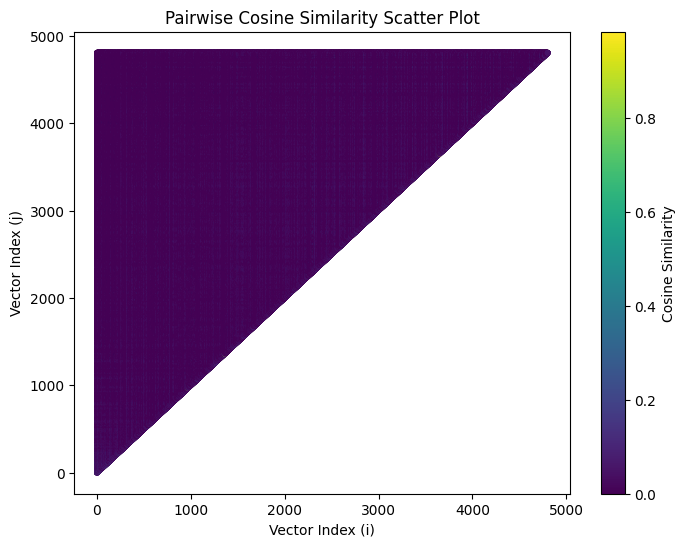

In [67]:
# Convert the similarity matrix to a list of coordinates
coordinates = []
for i in range(len(similarity)):
    for j in range(i+1, len(similarity)):
        coordinates.append((i, j, similarity[i][j]))

x, y, sim_values = zip(*coordinates)

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, c=sim_values, cmap='viridis', s=10)
plt.colorbar(label='Cosine Similarity')
plt.xlabel('Vector Index (i)')
plt.ylabel('Vector Index (j)')
plt.title('Pairwise Cosine Similarity Scatter Plot')
plt.show()

In [68]:
#function to recommend the movies
def recommend(movie):

    #find the index of the movies
    movie_index = new_df[new_df['title']==movie].index[0]
    distances = similarity[movie_index]
    movies_list = sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:6]
    
    #to fetch movies from indeces
    for i in movies_list:
        print(new_df.iloc[i[0]].title)

In [69]:
recommend('Batman Begins')

The Dark Knight
The Dark Knight Rises
Batman
Batman & Robin
Batman


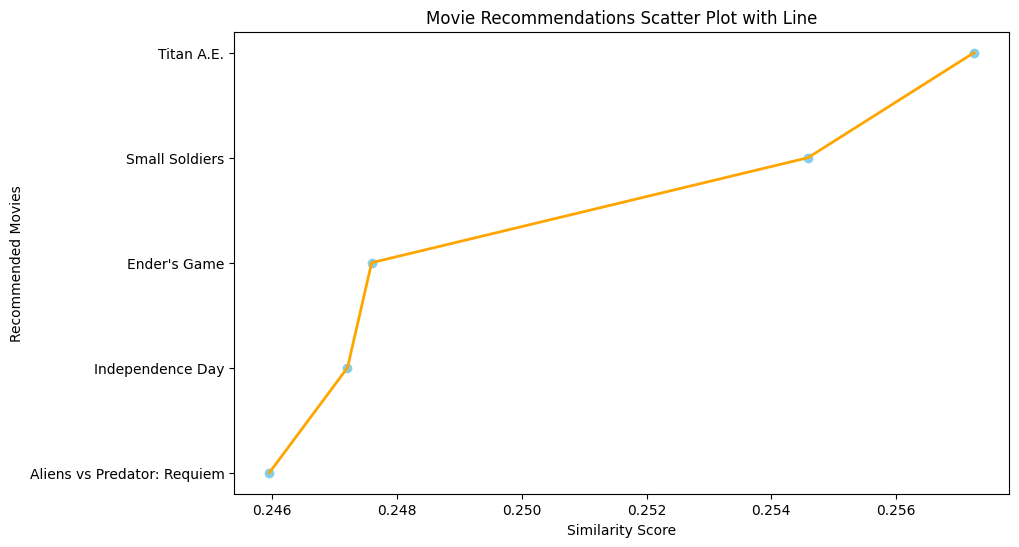

In [70]:
def recommend(movie):
    movie_index = new_df[new_df['title'] == movie].index[0]
    distances = similarity[movie_index]

    movie_indices_and_scores = list(enumerate(distances))

    sorted_movies = sorted(movie_indices_and_scores, key=lambda x: x[1], reverse=True)[1:6]

    recommended_movies = [new_df.iloc[i[0]].title for i in sorted_movies]
    similarity_scores = [i[1] for i in sorted_movies]

    plt.figure(figsize=(10, 6))
    plt.scatter(similarity_scores, recommended_movies, color='skyblue', marker='o')
    plt.plot(similarity_scores, recommended_movies, linestyle='-', color='orange', linewidth=2)
    plt.xlabel('Similarity Score')
    plt.ylabel('Recommended Movies')
    plt.title('Movie Recommendations Scatter Plot with Line')
    plt.gca().invert_yaxis()
    plt.show()

recommend('Avatar')

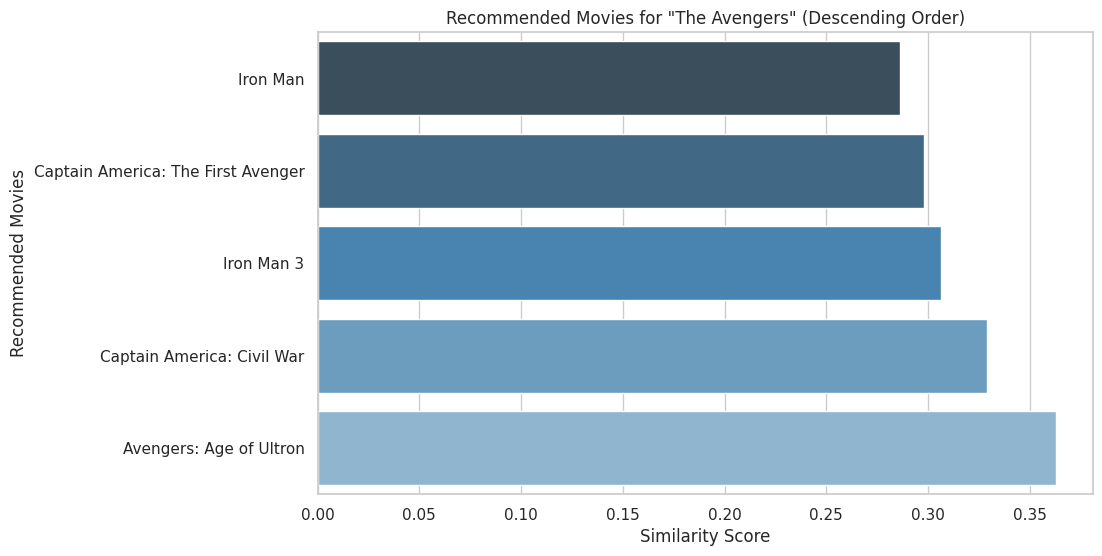

In [71]:
def recommend(movie):
    movie_index = new_df[new_df['title'] == movie].index[0]
    distances = similarity[movie_index]
    movies_list = sorted(list(enumerate(distances)), key=lambda x: x[1], reverse=True)[1:6]

    recommended_movies = [new_df.iloc[i[0]].title for i in movies_list]
    similarity_scores = [i[1] for i in movies_list]

    plt.figure(figsize=(10, 6))
    sns.set(style="whitegrid")
    sns.barplot(x=similarity_scores, y=recommended_movies, palette='Blues_d')
    plt.xlabel('Similarity Score')
    plt.ylabel('Recommended Movies')
    plt.title(f'Recommended Movies for "{movie}" (Descending Order)')
    plt.gca().invert_yaxis()
    plt.show()

recommend('The Avengers')

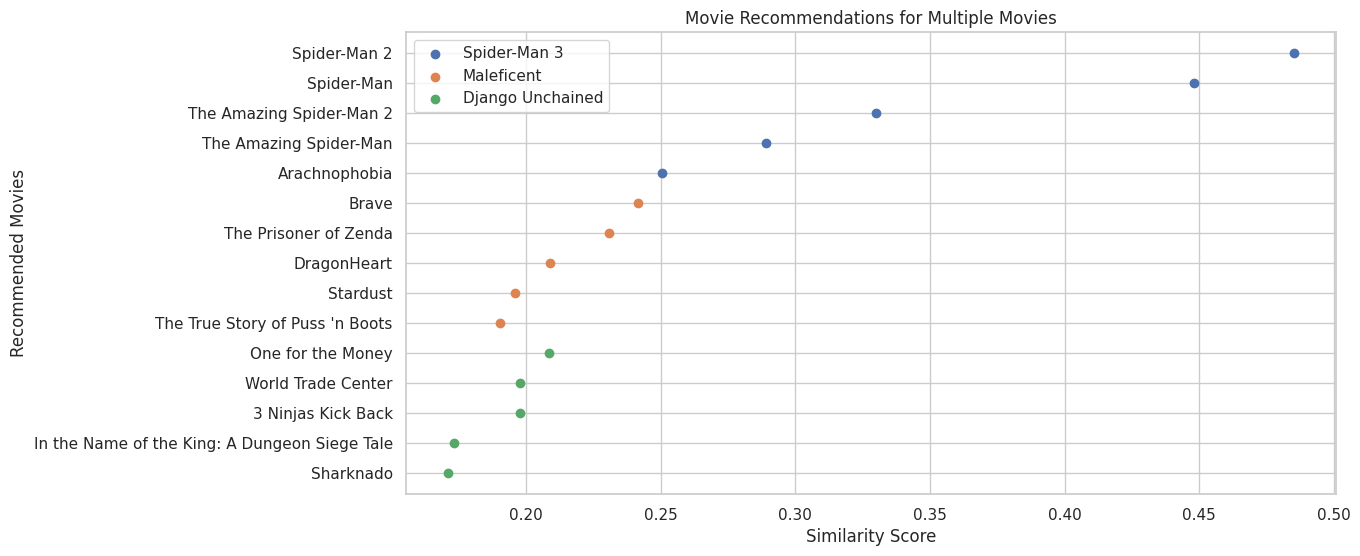

In [72]:
# Function to recommend movies and visualize the recommendations as a combined scatter plot
def recommend_movies(movie_list):
    plt.figure(figsize=(12, 6))
    plt.gca().invert_yaxis()

    for movie in movie_list:
        movie_index = new_df[new_df['title'] == movie].index[0]
        distances = similarity[movie_index]

        movie_indices_and_scores = list(enumerate(distances))

        sorted_movies = sorted(movie_indices_and_scores, key=lambda x: x[1], reverse=True)[1:6]

        recommended_movies = [new_df.iloc[i[0]].title for i in sorted_movies]
        similarity_scores = [i[1] for i in sorted_movies]

        plt.scatter(similarity_scores, recommended_movies, label=movie)

    plt.xlabel('Similarity Score')
    plt.ylabel('Recommended Movies')
    plt.title('Movie Recommendations for Multiple Movies')
    plt.legend()
    plt.show()

movies_to_recommend = ['Spider-Man 3', 'Maleficent', 'Django Unchained']

recommend_movies(movies_to_recommend)

In [73]:
import pickle

In [74]:
pickle.dump(new_df.to_dict(),open('movies_content.pkl','wb'))

In [75]:
pickle.dump(similarity,open('similarity_content.pkl','wb'))